In [1]:
from ler.rates import LeR
from ler.utils import get_param_from_json
import numpy as np
import matplotlib.pyplot as plt

# other necessary imports
from astropy.cosmology import LambdaCDM

In [2]:
ler = LeR(
    npool=8,
    verbose=False,
    z_max=10,
    event_type='BNS',
    source_priors={'theta_jn': 'sampler_uniform',},
    source_priors_params={'theta_jn': {'min_': 0, 'max_': np.pi},},
    mtot_max=51,
    minimum_frequency = 10.0,
    ifos = ['ET', 'CE', 'A1'],
)

## Unlensed 

In [4]:
ler.selecting_n_unlensed_detectable_events(
    size=50000,
    batch_size=200000,
    snr_threshold=6.0,
    resume=True,
    output_jsonfile='n_unlensed_param_detectable_3G_super_sub_bns.json',
    meta_data_file='meta_unlensed_3G_super_sub_bns.json',
    detectability_condition='step_function',
    trim_to_size=False,
);

collected number of detectable events =  151734
stored detectable unlensed params in ./ler_data/n_unlensed_param_detectable_3G_super_sub_bns.json
stored meta data in ./ler_data/meta_unlensed_3G_super_sub_bns.json


In [13]:
# 438.1, 1015.1 | 21.1, 46.4 |
438.1/21.1, 1015.1/46.4

(20.76303317535545, 21.877155172413794)

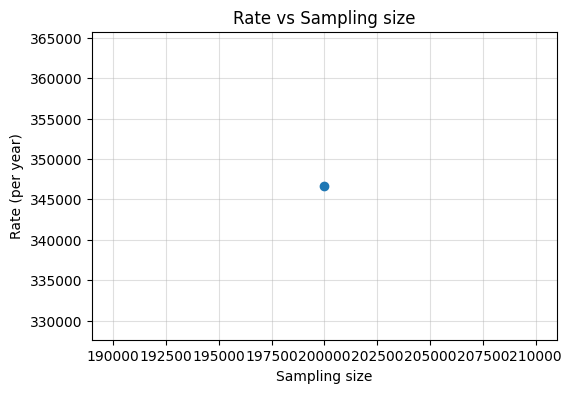

In [6]:
# getting data from json
meta_data= get_param_from_json("./ler_data/meta_unlensed_3G_super_sub_bns.json")

# plot the rate vs sampling size
plt.figure(figsize=(6,4))
plt.plot(meta_data['events_total'], meta_data['total_rate'], 'o-')
plt.xlabel('Sampling size')
plt.ylabel('Rate (per year)')
plt.title('Rate vs Sampling size')
plt.grid(alpha=0.4)
plt.show()

### Sub+Super

In [7]:
# select only events after sampling size of 
idx = np.where(meta_data['events_total'] > 0)[0]
# take average 
gw_rate_unlensed1 = np.mean(meta_data['total_rate'][idx])
print('Unlensed GW Rate (per year), SNR>6 =', gw_rate_unlensed1)

Unlensed GW Rate (per year), SNR>6 = 346692.05165490136


### Super

In [9]:
unlensed_param = get_param_from_json("./ler_data/n_unlensed_param_detectable_3G_super_sub_bns.json")

In [11]:
snr = unlensed_param['optimal_snr_net']
idx = snr>8.0
snr8_vs_snr6 = np.sum(idx)/len(snr)
print('Unlensed GW Rate (per year), SNR>8 =', gw_rate_unlensed1*snr8_vs_snr6) 

Unlensed GW Rate (per year), SNR>8 = 275573.2727404164


## Lensed events

In [14]:
ler.selecting_n_lensed_detectable_events(
    size=10000,
    batch_size=200000,
    snr_threshold=[6.0, 6.0],
    num_img=[1, 1],
    resume=True,
    detectability_condition='step_function',
    output_jsonfile='n_lensed_param_detectable_3G_super_sub_bns.json',
    meta_data_file='meta_lensed_3G_super_sub_bns.json',
    trim_to_size=False,
    nan_to_num=False,
);

collected number of detectable events =  0


100%|█████████████████████████████████████████████████████████████████| 8/8 [00:03<00:00,  2.25it/s]


given detectability_condition == step_function
collected number of detectable events =  94854
total number of events =  200000
total rate (yr^-1): 475.42126867216916
storing detectable lensed params in ./ler_data/n_lensed_param_detectable_3G_super_sub_bns.json
storing meta data in ./ler_data/meta_lensed_3G_super_sub_bns.json


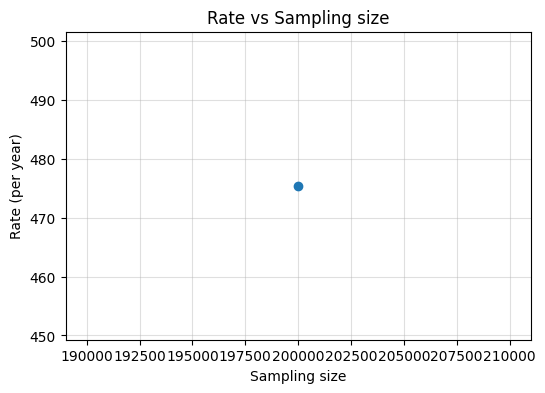

In [16]:
# getting data from json
meta_data= get_param_from_json("./ler_data/meta_lensed_3G_super_sub_bns.json")

# plot the rate vs sampling size
plt.figure(figsize=(6,4))
plt.plot(meta_data['events_total'], meta_data['total_rate'], 'o-')
plt.xlabel('Sampling size')
plt.ylabel('Rate (per year)')
plt.title('Rate vs Sampling size')
plt.grid(alpha=0.4)
plt.show()

### Sub+Super

In [17]:
# select only events after sampling size of 
idx = np.where(meta_data['events_total'] > 0)[0]
# take average 
gw_rate_lensed1 = np.mean(meta_data['total_rate'][idx])
print('Lensed GW Rate (per year), 2 or more images SNR>6 =', gw_rate_lensed1)

Lensed GW Rate (per year), 2 or more images SNR>6 = 475.42126867216916


### Super

In [18]:
snr_lensed = get_param_from_json("./ler_data/n_lensed_param_detectable_O4_spur_sub.json")['optimal_snr_net']
idx = snr_lensed>8.0
idx = np.sum(idx, axis=1)>=2
snr8_vs_snr6 = np.sum(idx)/len(snr_lensed)
print('Lensed GW Rate (per year), 2 or more images SNR>8 =', gw_rate_lensed1*snr8_vs_snr6)

Lensed GW Rate (per year), 2 or more images SNR>8 = 221.9409903466335


In [26]:
0.0526/snr8_vs_snr6

0.11267480916030534

In [27]:
# 438.1, 1015.1 | 21.1, 51.6 | 
438.1/21.1, 1015.1/51.6

(20.76303317535545, 19.67248062015504)

In [28]:
# 1.0, 2.1 | 5.3e-2, 11.3e-2
1.0/5.3e-2, 2.1/11.3e-2

(18.867924528301888, 18.58407079646018)

In [29]:
# 21.1, 51.6 | 5.3e-2, 11.3e-2
21.1/5.3e-2, 51.6/11.3e-2

(398.11320754716985, 456.6371681415929)

In [32]:
# 11543.2 | 21.1, 51.6 |
11543.2/21.1, 11543.2/51.6

(547.0710900473933, 223.70542635658916)

In [12]:
# 100600.3, 101895.3 | 275573.2, 346692.1 |
100600.3/275573.2, 101895.3/346692.1

(0.36505835835995665, 0.29390718738615623)

In [19]:
# 107.6, 112.7 | 221.9, 475.4 |
107.6/221.9, 112.7/475.4

(0.4849031095087877, 0.23706352545225076)

In [21]:
# 275573.2, 346692.1 | 221.9, 475.4 |
275573.2/221.9, 346692.1/475.4

(1241.8801261829653, 729.263988220446)

In [32]:
# 11543.2 | 21.1, 51.6 
11543.2/21.1, 11543.2/51.6


(547.0710900473933, 223.70542635658916)

In [22]:
# 11543.2 | 275573.2, 346692.1 |
11543.2/275573.2, 11543.2/346692.1

(0.04188796298043496, 0.03329524958890036)

In [24]:
# 10.60 | 221.9, 475.4 |
10.60/221.9, 10.60/475.4

(0.047769265434880574, 0.022297013041649136)

In [25]:
# 438.1, 1015.1 | 1.0, 2.1 |
438.1/1.0, 1015.1/2.1

(438.1, 483.38095238095235)

In [26]:
# 100600.3, 101895.3 | 107.6, 112.7
100600.3/107.6, 101895.3/112.7

(934.947026022305, 904.1286601597161)

In [27]:
# 1.0, 2.1 | 5.3e-2, 11.3e-2
1.0/5.3e-2, 2.1/11.3e-2

(18.867924528301888, 18.58407079646018)

In [28]:
# 107.6, 112.7 | 221.9, 475.4
107.6/221.9, 112.7/475.4

(0.4849031095087877, 0.23706352545225076)

In [29]:
# 1.0, 2.1 | 5.3e-2, 11.3e-2
1.0/5.3e-2, 2.1/11.3e-2

(18.867924528301888, 18.58407079646018)

In [31]:
# 275573.2, 346692.1 | 221.9, 475.4
275573.2/221.9, 346692.1/475.4

(1241.8801261829653, 729.263988220446)